# Making Informed Investment Decisions in California Housing Market using Machine Learning

Student Name : Bhavya Hegde <br>
Team Name : Code Wizards  <br>
SJSU ID : 016656029 <br>

The following cells consists of:

Objectve functions

Data narrative

Data visualization

Data cleaning

Fractal clustering

Business Narrative :
Our mission is to provide valuable insights and guidance to prospective investors and homebuyers, empowering them to make informed decisions about investing in real estate. We understand that real estate is a significant financial commitment, and it’s crucial to assess its viability thoroughly. Through our platform, we offer a comprehensive suite of tools, data, and expertise to help individuals navigate the complex world of real estate investments.

## Objective Function
We are planning to group areas in the city into different categories based on house prices and crime rates using a method called fractal clustering. This method helps us see patterns and trends at different levels, giving us a deeper understanding of the city's neighborhoods. By doing this, we hope to identify specific areas where house prices are influenced by the crime rate, which can help in making informed decisions for home buyers and city planners.

##Import libraries

In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
# Authenticate and PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
id="18cvJIqzfhTSrV53TJZruhYEVNO47b_b5"

In [ ]:
from pandas.core.indexes.interval import InvalidIndexError
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


## **Data Narrative**

Main dataset is downloaded from redfin and uploaded here  : https://drive.google.com/drive/u/2/folders/1loMBo5UB_9acDQlJCkSyP4pFmRagVwq- <br>

Scrapped data for <br>
walk score is from :  https://www.walkscore.com/ <br>
crime rate , property crime: https://247wallst.com/state/crime-in-california/ <br>
School rating : https://www.niche.com/places-to-live/z/95134/ <br>

all the data mentioned here is uploaded in the data folder under(https://drive.google.com/drive/u/2/folders/1VmtLYCkWVi06I0fiD4URPcnLRHanyO-B) <br>

Final dataset : https://drive.google.com/drive/u/2/folders/1loMBo5UB_9acDQlJCkSyP4pFmRagVwq- <br>

In this dataset, we are exploring various attributes related to property sales in a specific region. The dataset contains the following columns:

**SALE TYPE**: This column indicates the type of sale transaction that took place. It could include categories such as new listings, resale, foreclosure, etc.

**SOLD DATE**: The date on which the property was sold. This would help in analyzing the time trends in property sales.

**PROPERTY TYPE**: This column categorizes the properties into various types such as single-family homes, apartments, condos, etc.

**ADDRESS**: The specific address of the property, providing detailed location information.

**CITY**: The city where the property is located.

STATE OR PROVINCE: The state or province where the property is situated.

**ZIP_CODE**: The postal code of the property's location, which can be used for regional analysis.

**PRICE**: The selling price of the property. This is a critical column for analyzing the real estate market trends.

**BEDS**: The number of bedrooms in the property, which is a vital attribute affecting the property's price.

**BATHS**: The number of bathrooms in the property, another significant factor influencing the property's value.

**SOURCE**: The source from where the data was collected, which could help in verifying the authenticity of the data.

**MLS#**: The Multiple Listing Service number, a unique identifier for the property listing.

**FAVORITE**: A column indicating whether the property was marked as a favorite, possibly by potential buyers or real estate agents.

**INTERESTED**: This column might indicate the level of interest or the number of interested parties for a particular property.

**LATITUDE & LONGITUDE**: These columns provide the geographical coordinates of the property, which can be used for geographical analyses and visualizations.

**WALK_SCORE**: A score indicating the walkability of the neighborhood where the property is located. It can be a significant factor for buyers.

**PROPERTY_CRIME**: This column indicates the rate of property crimes in the area where the property is located, which can influence the property's desirability.

**TOTAL_CRIME**: A column indicating the total crime rate in the area, encompassing various types of crimes.

**SCHOOL_RANKING**: This column provides information on the ranking of schools in the vicinity of the property, a significant factor for families with children


In [ ]:
downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('RF_Housingdata_final.csv')
data=pd.read_csv("RF_Housingdata_final.csv")
data.shape
data.head()

,SALE TYPE,SOLD DATE,PROPERTY TYPE,ADDRESS,CITY,STATE OR PROVINCE,ZIP_CODE,PRICE,BEDS,BATHS,...,SOURCE,MLS#,FAVORITE,INTERESTED,LATITUDE,LONGITUDE,WALK_SCORE,PROPERTY_CRIME,TOTAL_CRIME,SCHOOL_RANKING
0,MLS Listing,NaN,Condo/Co-op,407 Orange St #301,Oakland,CA,94610,535000,1.0,1.0,...,"bridgeMLS, Bay East AOR, or Contra Costa AOR",41038381,N,Y,37.817373,-122.254688,84,6421,7692,712.0
1,MLS Listing,NaN,Single Family Residential,5450 Proctor Ave,Oakland,CA,94618,1075000,1.0,1.0,...,"bridgeMLS, Bay East AOR, or Contra Costa AOR",41038260,N,Y,37.835305,-122.221226,30,6421,7692,582.0
2,MLS Listing,NaN,Condo/Co-op,1001 46Th St #212,Emeryville,CA,94608,589000,1.0,1.0,...,"bridgeMLS, Bay East AOR, or Contra Costa AOR",41037668,N,Y,37.835468,-122.276067,90,21187,22528,NaN
3,MLS Listing,NaN,Condo/Co-op,245 Perkins St #104,Oakland,CA,94610,439000,1.0,1.0,...,"bridgeMLS, Bay East AOR, or Contra Costa AOR",41038165,N,Y,37.814753,-122.255872,84,6421,7692,712.0
4,MLS Listing,NaN,Condo/Co-op,666 Oakland Ave #105,Oakland,CA,94611,419000,1.0,1.0,...,"bridgeMLS, Bay East AOR, or Contra Costa AOR",41038131,N,Y,37.820653,-122.249832,86,6421,7692,564.0


In [ ]:
data = data.drop(columns=['SALE TYPE', 'URL (SEE https://www.redfin.com/buy-a-home/comparative-market-analysis FOR INFO ON PRICING)', 'FAVORITE', 'INTERESTED', 'MLS#'])

In [ ]:
data.shape

(4042, 26)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4042 entries, 0 to 4041
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   SOLD DATE                   0 non-null      float64
 1   PROPERTY TYPE               4042 non-null   object 
 2   ADDRESS                     4031 non-null   object 
 3   CITY                        4042 non-null   object 
 4   STATE OR PROVINCE           4042 non-null   object 
 5   ZIP_CODE                    4042 non-null   int64  
 6   PRICE                       4042 non-null   int64  
 7   BEDS                        3901 non-null   float64
 8   BATHS                       3807 non-null   float64
 9   LOCATION                    4039 non-null   object 
 10  SQUARE FEET                 3854 non-null   float64
 11  LOT SIZE                    3173 non-null   float64
 12  YEAR BUILT                  3672 non-null   float64
 13  DAYS ON MARKET              3895 

## **Data Visualization**

array([[<Axes: title={'center': 'SOLD DATE'}>,
        <Axes: title={'center': 'ZIP_CODE'}>,
        <Axes: title={'center': 'PRICE'}>,
        <Axes: title={'center': 'BEDS'}>],
       [<Axes: title={'center': 'BATHS'}>,
        <Axes: title={'center': 'SQUARE FEET'}>,
        <Axes: title={'center': 'LOT SIZE'}>,
        <Axes: title={'center': 'YEAR BUILT'}>],
       [<Axes: title={'center': 'DAYS ON MARKET'}>,
        <Axes: title={'center': '$/SQUARE FEET'}>,
        <Axes: title={'center': 'HOA/MONTH'}>,
        <Axes: title={'center': 'LATITUDE'}>],
       [<Axes: title={'center': 'LONGITUDE'}>,
        <Axes: title={'center': 'WALK_SCORE'}>,
        <Axes: title={'center': 'PROPERTY_CRIME'}>,
        <Axes: title={'center': 'TOTAL_CRIME'}>],
       [<Axes: title={'center': 'SCHOOL_RANKING'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

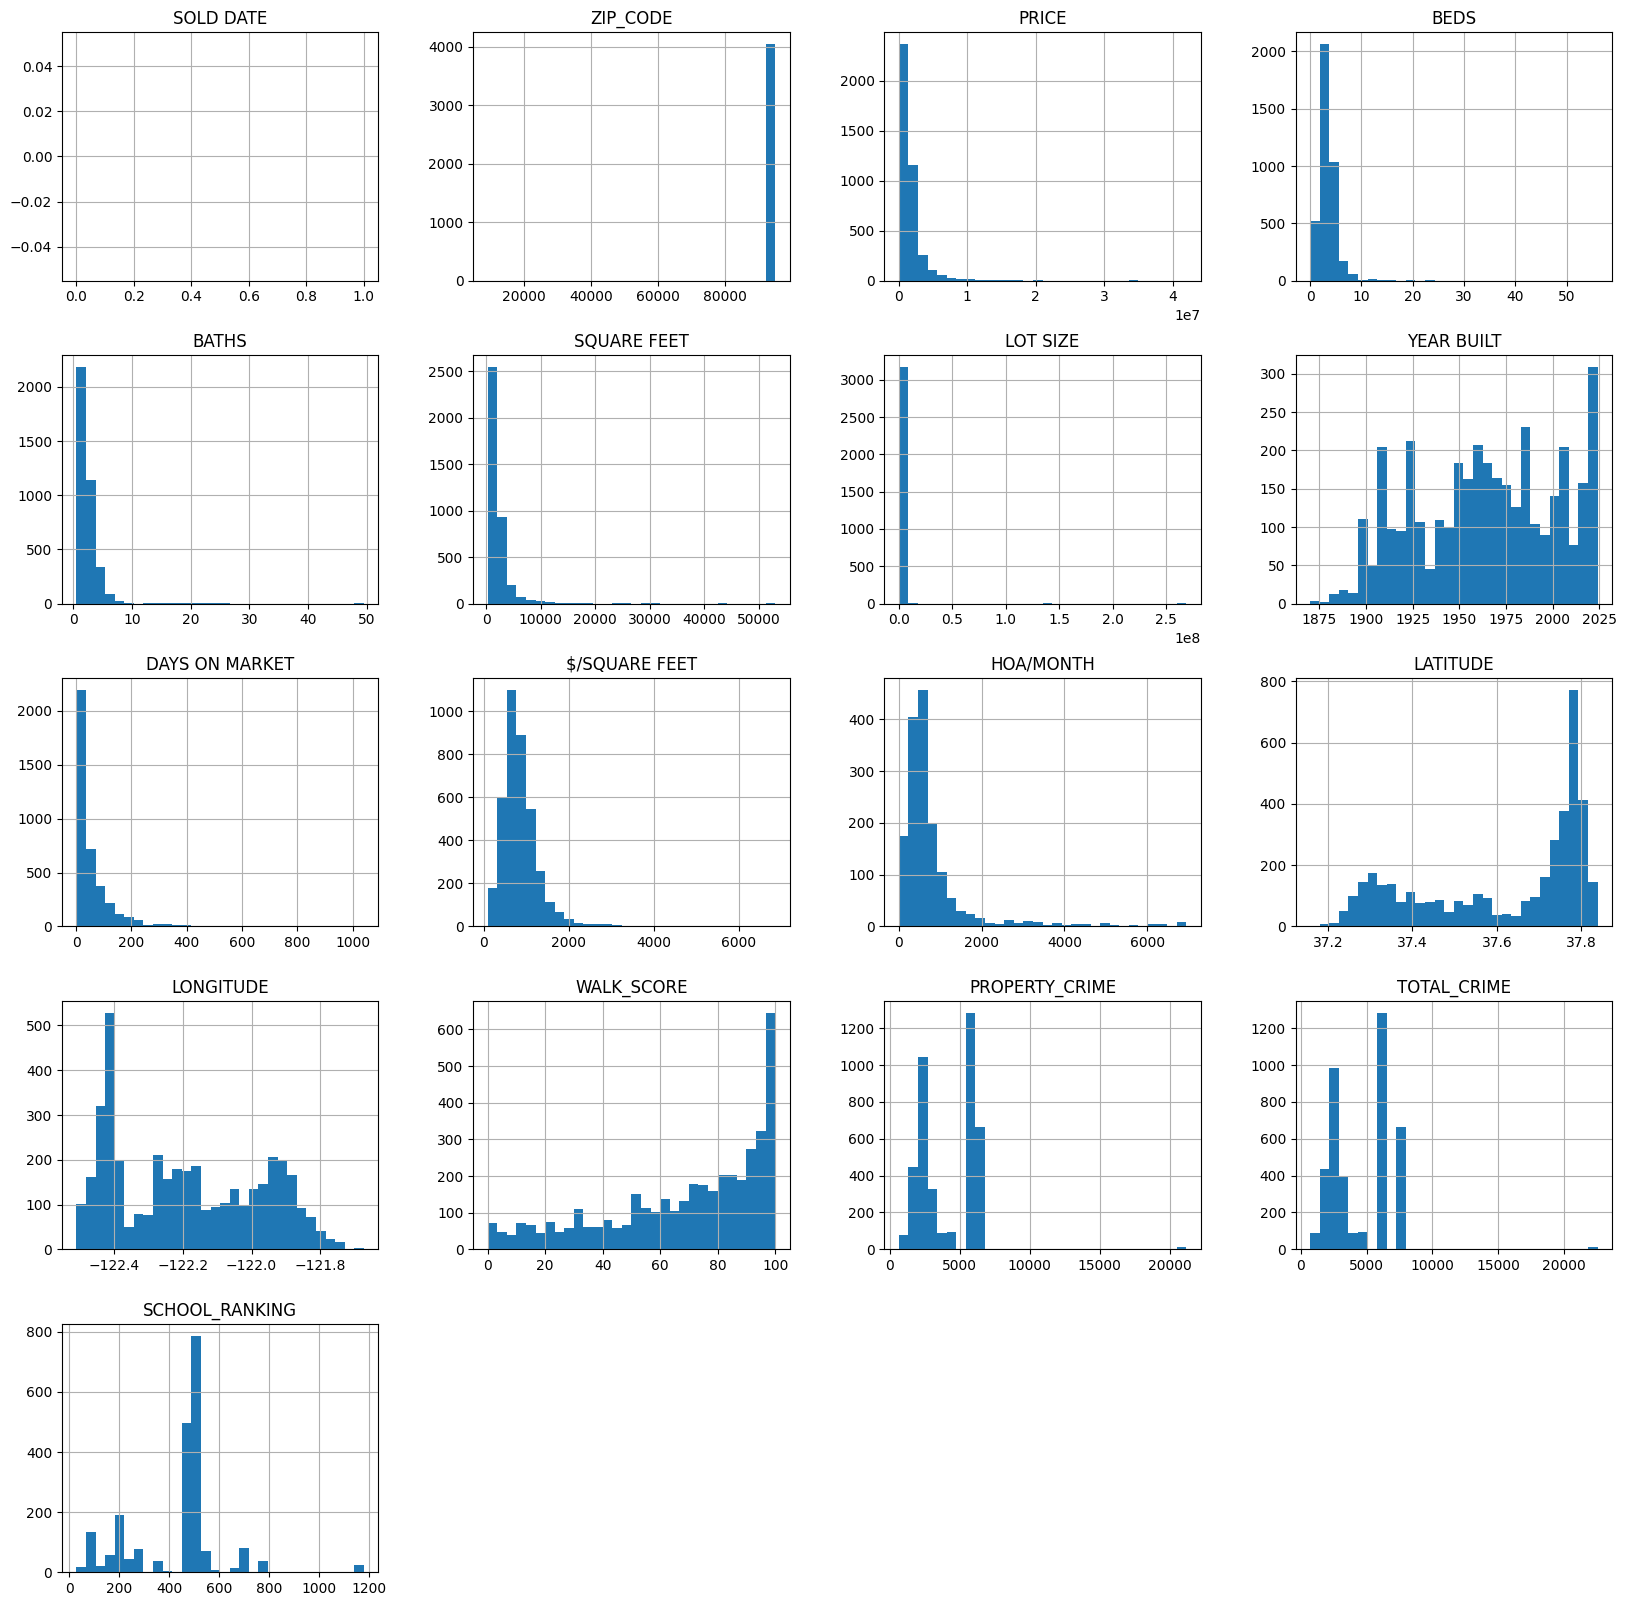

In [ ]:
data.hist(bins=30,figsize=[20,20])

<Axes: title={'center': 'Missing data'}, ylabel='Count'>

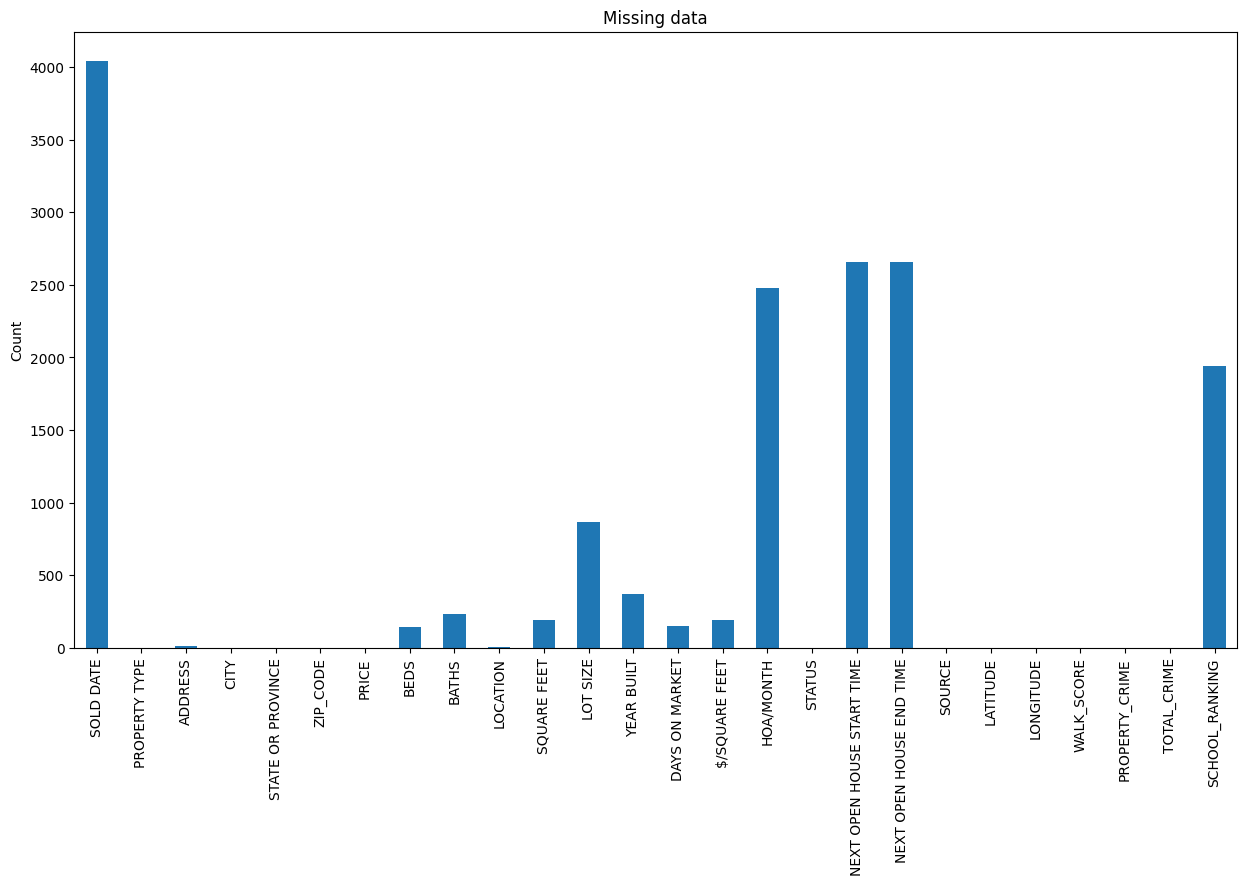

In [ ]:
# Display NULL data value using heatmap
plt.figure(figsize=(15,8))
plt.title('Missing data')
plt.ylabel("Count")
data.isnull().sum().plot(kind= 'bar' )

## Data Cleaning

In [ ]:
data.duplicated().any()

True

In [ ]:
data = data.drop_duplicates()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3886 entries, 0 to 4041
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   SOLD DATE                   0 non-null      float64
 1   PROPERTY TYPE               3886 non-null   object 
 2   ADDRESS                     3875 non-null   object 
 3   CITY                        3886 non-null   object 
 4   STATE OR PROVINCE           3886 non-null   object 
 5   ZIP_CODE                    3886 non-null   int64  
 6   PRICE                       3886 non-null   int64  
 7   BEDS                        3756 non-null   float64
 8   BATHS                       3662 non-null   float64
 9   LOCATION                    3883 non-null   object 
 10  SQUARE FEET                 3709 non-null   float64
 11  LOT SIZE                    3039 non-null   float64
 12  YEAR BUILT                  3527 non-null   float64
 13  DAYS ON MARKET              3740 

<Axes: title={'center': 'Missing data'}, ylabel='Count'>

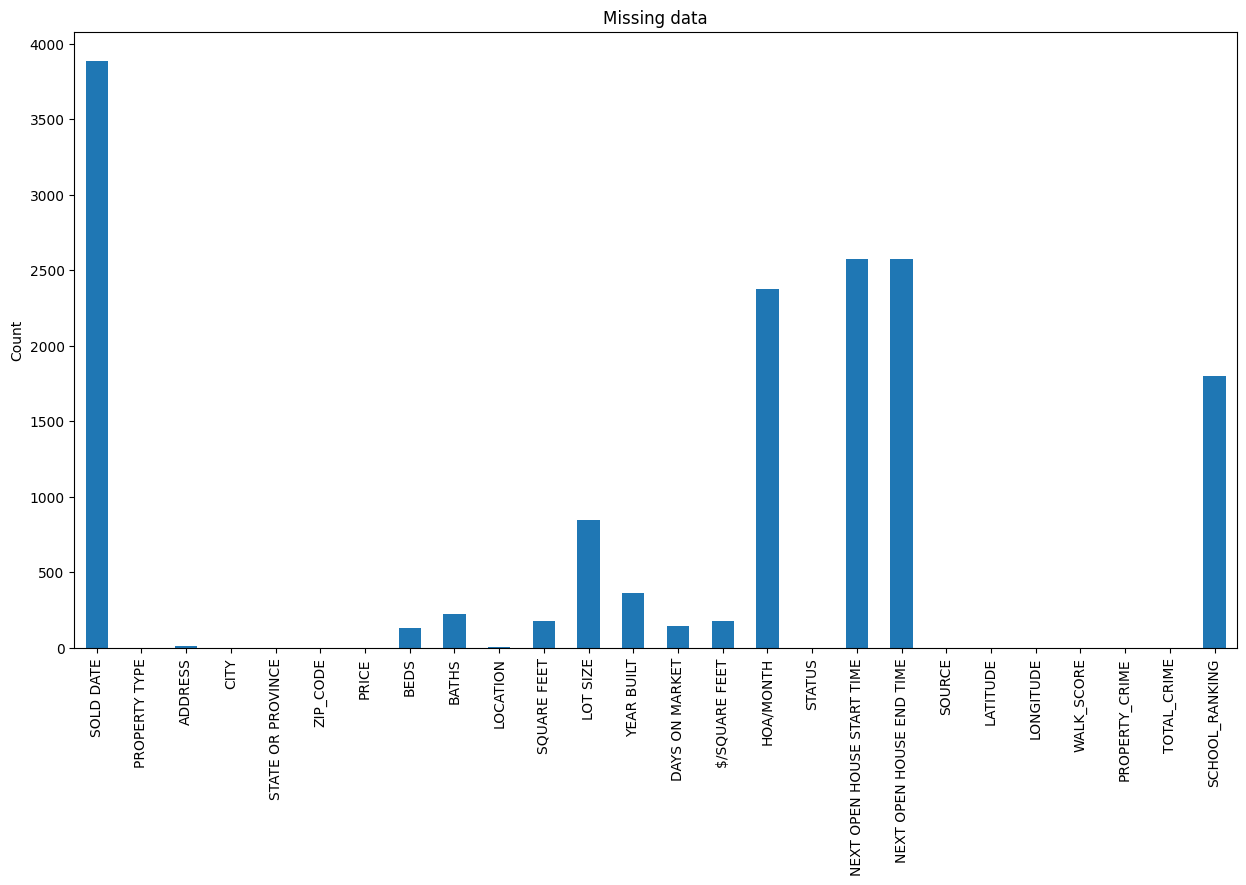

In [ ]:
# Display NULL data value using heatmap
plt.figure(figsize=(15,8))
plt.title('Missing data')
plt.ylabel("Count")
data.isnull().sum().plot(kind= 'bar' )

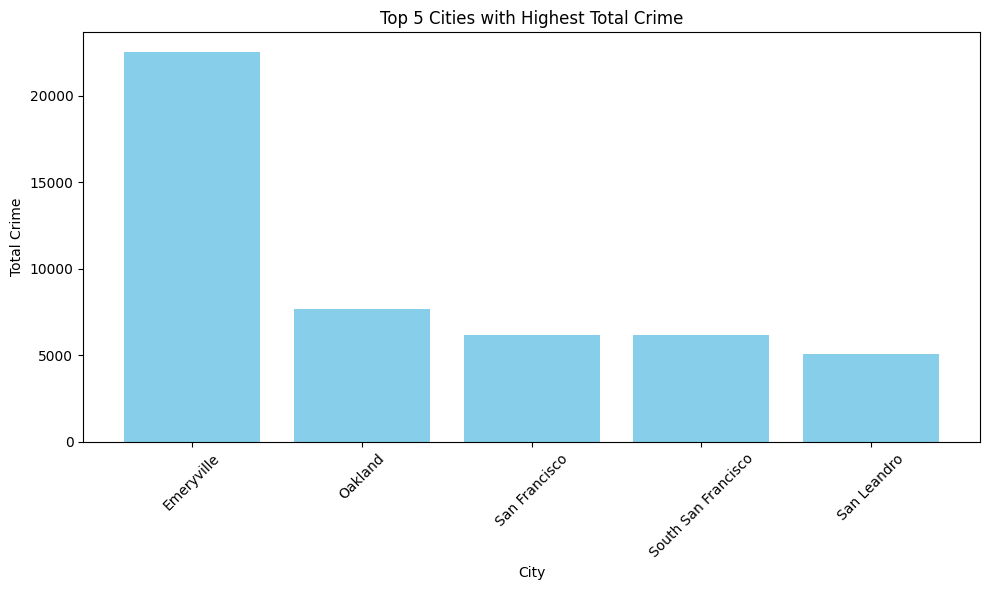

In [ ]:
import matplotlib.pyplot as plt

# Remove duplicate cities and keep only the first occurrence
data_unique = data.drop_duplicates(subset=['CITY'], keep='first')

# Get the top 5 cities with the highest total crime from the unique data
top_5_cities = data_unique.nlargest(5, 'TOTAL_CRIME')[['CITY', 'TOTAL_CRIME']]

# Plotting
plt.figure(figsize=(10,6))
plt.bar(top_5_cities['CITY'], top_5_cities['TOTAL_CRIME'], color='skyblue')
plt.title('Top 5 Cities with Highest Total Crime')
plt.xlabel('City')
plt.ylabel('Total Crime')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


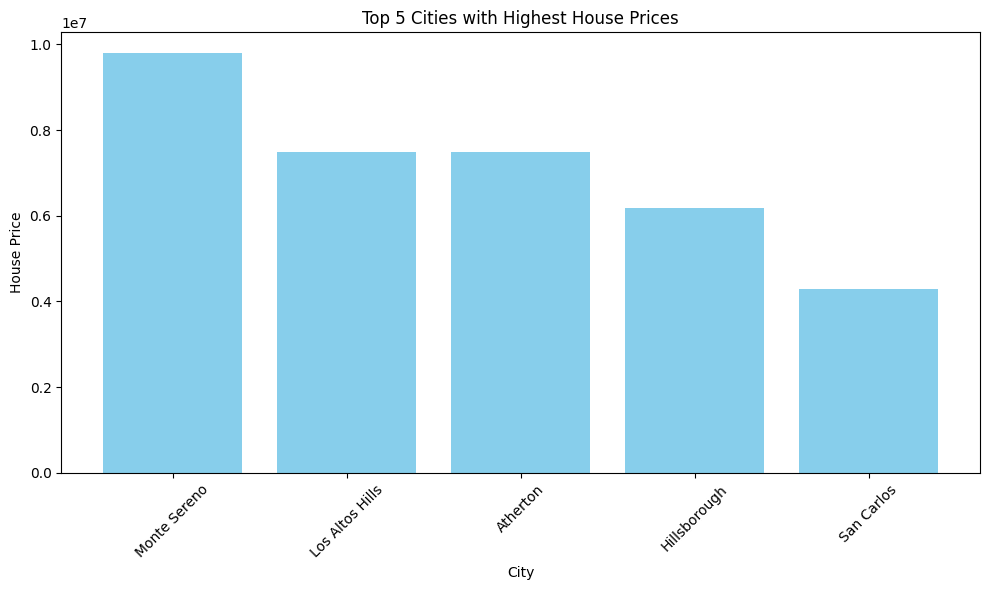

In [ ]:
import matplotlib.pyplot as plt

# Remove duplicate cities and keep only the first occurrence
data_unique = data.drop_duplicates(subset=['CITY'], keep='first')

# Get the top 5 cities with the highest house prices from the unique data
top_5_cities_house_price = data_unique.nlargest(5, 'PRICE')[['CITY', 'PRICE']]

# Plotting
plt.figure(figsize=(10,6))
plt.bar(top_5_cities_house_price['CITY'], top_5_cities_house_price['PRICE'], color='skyblue')
plt.title('Top 5 Cities with Highest House Prices')
plt.xlabel('City')
plt.ylabel('House Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
df=data.dropna()

In [ ]:
data_copy = data.copy()

## **Fractal clustering based on City and Total Crime**

In [ ]:
city_crime=data_copy[['CITY','TOTAL_CRIME']]

In [ ]:
from sklearn.preprocessing import RobustScaler
from sklearn.cluster import KMeans
from sklearn import metrics

In [ ]:
import warnings
from sklearn.exceptions import ConvergenceWarning
from pandas.errors import SettingWithCopyWarning

def plot_cluster(df, max_loop=50):
    warnings.filterwarnings("ignore", category=SettingWithCopyWarning)
    warnings.filterwarnings("ignore", category=ConvergenceWarning)
    """
    Looking at the performance of various number of clusters using K-Means.
    Performance is evaluated by within cluster SSE and silhouette score.
    """
    try:
        df.drop('cluster', axis=1, inplace=True)
    except:
        next
    X = df.iloc[:, 1:]

    # robust scaling is used so that the centering and scaling statistics are therefore not influenced by a few number of very large marginal outliers as they are based on percentiles
    rb = RobustScaler()
    X_rb = rb.fit_transform(X)

    sse_within_cluster = {}
    silhouette_score = {}

    for k in range(2, max_loop):
        kmeans = KMeans(n_clusters=k,  random_state=10, n_init=10)
        kmeans.fit(X_rb)
        sse_within_cluster[k] = kmeans.inertia_
        silhouette_score[k] = metrics.silhouette_score(X_rb, kmeans.labels_, random_state=10)

    _ = plt.figure(figsize=(10,6))
    ax1 = plt.subplot(211)
    _ = plt.plot(list(sse_within_cluster.keys()), list(sse_within_cluster.values()))
    _ = plt.xlabel("Number of Clusters")
    _ = plt.ylabel("SSE Within Cluster")
    _ = plt.title("Within Cluster SSE After K-Means Clustering")
    _ = plt.xticks([i for i in range(2, max_loop)], rotation=75)

    ax2 = plt.subplot(212)
    _ = plt.plot(list(silhouette_score.keys()), list(silhouette_score.values()))
    _ = plt.xlabel("Number of Clusters")
    _ = plt.ylabel("Silhouette Score")
    _ = plt.title("Silhouette Score After K-Means Clustering")
    _ = plt.xticks([i for i in range(2, max_loop)], rotation=75)

    plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.5, wspace=0.35)

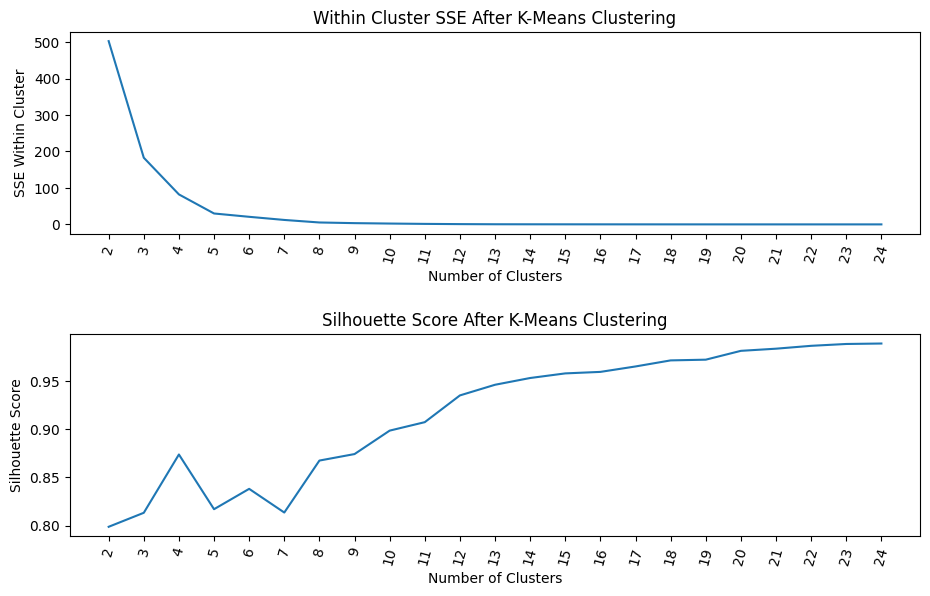

In [ ]:

plot_cluster(city_crime, max_loop=25)

In [ ]:
import warnings

from sklearn.exceptions import ConvergenceWarning
from pandas.errors import SettingWithCopyWarning


def apply_cluster(df, clusters=2):
    warnings.filterwarnings("ignore", category=SettingWithCopyWarning)
    """
    Applying K-Means with the optimal number of clusters identified
    """
    try:
        df.drop('cluster', axis=1, inplace=True)
    except:
        next
    X = df.iloc[:,1:]
    rb = RobustScaler()
    X_rb = rb.fit_transform(X)
    kmeans = KMeans(n_clusters=clusters, random_state=10, n_init=10) #, n_jobs=-1)
    kmeans.fit(X_rb)
    score = metrics.silhouette_score(X_rb, kmeans.labels_, random_state=10)
    df['cluster'] = kmeans.labels_
    sse_within_cluster = kmeans.inertia_

    print("clustering performance")
    print("-----------------------------------")
    print("silhouette score: " + str(score))
    print("sse within cluster: " + str(sse_within_cluster))

    return df

In [ ]:
first_trial = apply_cluster(city_crime, clusters=4)

clustering performance
-----------------------------------
silhouette score: 0.8737630660427632
sse within cluster: 82.25943402710432


In [ ]:
cluster_df = (
    city_crime
    .groupby('cluster')
    .agg({"TOTAL_CRIME":"mean", "CITY":"count"})
    .sort_values('CITY')
    .reset_index()
)

cluster_df


,cluster,TOTAL_CRIME,CITY
0,2,22528.000000,14
1,3,7692.000000,650
2,0,6106.582723,1366
3,1,2599.080819,1856


Choosing cluster with lowest total crime

In [ ]:

first_trial.query("cluster == 1")

,CITY,TOTAL_CRIME,cluster
73,Piedmont,2131,1
251,Alameda,3474,1
252,Alameda,3474,1
253,Alameda,3474,1
254,Alameda,3474,1
...,...,...,...
4037,Atherton,1689,1
4038,Atherton,1689,1
4039,Atherton,1689,1
4040,Atherton,1689,1


In [ ]:
agg_df3_sub = first_trial.query("cluster == 1").reset_index(drop=True)

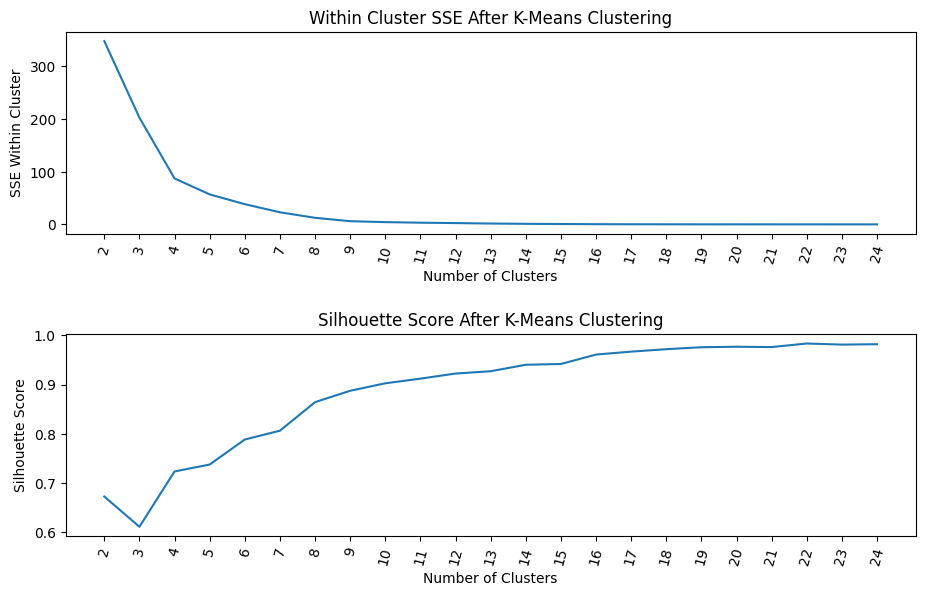

In [ ]:
plot_cluster(agg_df3_sub, max_loop=25)

In [ ]:
second_trial= apply_cluster(agg_df3_sub, clusters=6)

clustering performance
-----------------------------------
silhouette score: 0.7880346789755592
sse within cluster: 38.43467672677181


In [ ]:

sub_cluster_perf_df = (
    second_trial
    .groupby('cluster')
    .agg({"TOTAL_CRIME":"mean", "CITY":"count"})
    .sort_values('TOTAL_CRIME', ascending=False)
    .reset_index()
)

sub_cluster_perf_df


,cluster,TOTAL_CRIME,CITY
0,2,3499.285266,319
1,0,2885.736093,773
2,3,2345.968127,251
3,5,2025.791304,230
4,1,1604.525000,240
5,4,862.604651,43


In [ ]:
agg_df4_sub = second_trial.query("cluster == 4").reset_index(drop=True)

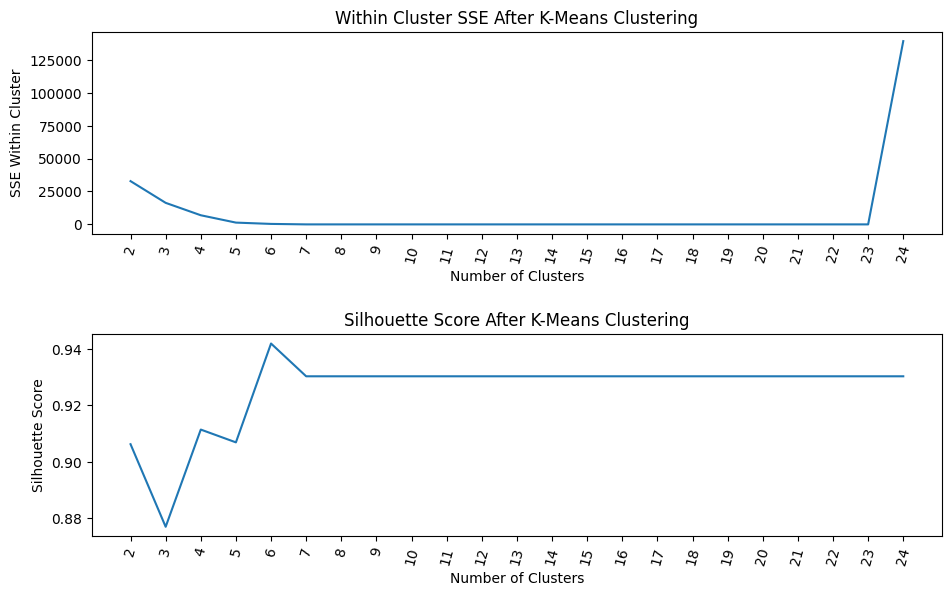

In [ ]:
plot_cluster(agg_df4_sub, max_loop=25)

In [ ]:
third_trial= apply_cluster(agg_df4_sub, clusters=3)

clustering performance
-----------------------------------
silhouette score: 0.8770633738950132
sse within cluster: 16357.827027027017


## Golden clusters

In [ ]:

sub_cluster_perf_df = (
    third_trial
    .groupby('cluster')
    .agg({"TOTAL_CRIME":"mean", "CITY":"count"})
    .sort_values('TOTAL_CRIME', ascending=False)
    .reset_index()
)

sub_cluster_perf_df

,cluster,TOTAL_CRIME,CITY
0,1,1066.800000,5
1,0,839.162162,37
2,2,709.000000,1


In [ ]:
third_trial.query("cluster == 2")

,CITY,TOTAL_CRIME,cluster
0,Danville,709,2


From this we can infer that Danville has the safest neighborhood with the lowest total  crime rate

##**Fractal Clustering based on total crime and house selling price**

Fractal clustering - objective function -  To identify neighborhoods that have low crime rates and affordable housing. This information could be useful for potential homebuyers or real estate investors. <br>
Calculating: Sum of Square errors within clusters and Silhouette score

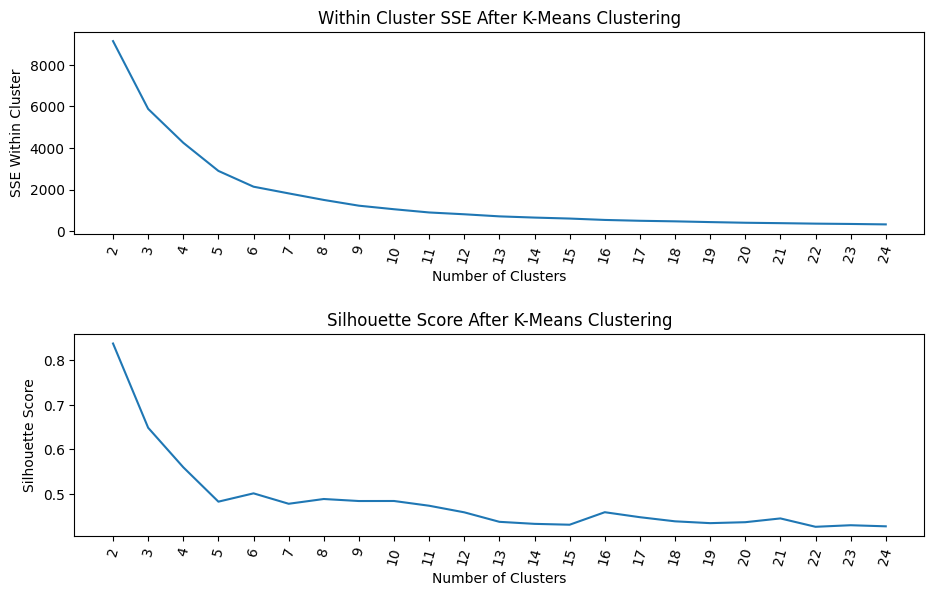

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import RobustScaler
from sklearn import metrics

def plot_cluster(data, max_loop=50):
    """
    Looking at the performance of various number of clusters using K-Means.
    Performance is evaluated by within cluster SSE and silhouette score.
    """
    try:
        data.drop('cluster', axis=1, inplace=True)
    except:
        pass
    X = data[['PRICE','TOTAL_CRIME']]

    # robust scaling is used so that the centering and scaling statistics are therefore not influenced by a few number of very large marginal outliers as they are based on percentiles
    rb = RobustScaler()
    X_rb = rb.fit_transform(X)

    sse_within_cluster = {}
    silhouette_score = {}

    for k in range(2, max_loop):
        kmeans = KMeans(n_clusters=k, random_state=10, n_init=10)
        kmeans.fit(X_rb)
        sse_within_cluster[k] = kmeans.inertia_
        silhouette_score[k] = metrics.silhouette_score(X_rb, kmeans.labels_, random_state=10)

    _ = plt.figure(figsize=(10,6))
    ax1 = plt.subplot(211)
    _ = plt.plot(list(sse_within_cluster.keys()), list(sse_within_cluster.values()))
    _ = plt.xlabel("Number of Clusters")
    _ = plt.ylabel("SSE Within Cluster")
    _ = plt.title("Within Cluster SSE After K-Means Clustering")
    _ = plt.xticks([i for i in range(2, max_loop)], rotation=75)

    ax2 = plt.subplot(212)
    _ = plt.plot(list(silhouette_score.keys()), list(silhouette_score.values()))
    _ = plt.xlabel("Number of Clusters")
    _ = plt.ylabel("Silhouette Score")
    _ = plt.title("Silhouette Score After K-Means Clustering")
    _ = plt.xticks([i for i in range(2, max_loop)], rotation=75)

    plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.5, wspace=0.35)

# Use the function with your data
plot_cluster(data, max_loop=25)


First trial of clustering

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import RobustScaler
from sklearn import metrics

def apply_cluster(data, clusters=2):
    """
    Applying K-Means with the optimal number of clusters identified
    """
    try:
        data.drop('cluster', axis=1, inplace=True)
    except:
        pass
    X = data[['PRICE','TOTAL_CRIME']]
    rb = RobustScaler()
    X_rb = rb.fit_transform(X)
    kmeans = KMeans(n_clusters=clusters, random_state=10, n_init=10)
    kmeans.fit(X_rb)
    score = metrics.silhouette_score(X_rb, kmeans.labels_, random_state=10)
    data['cluster'] = kmeans.labels_
    sse_within_cluster = kmeans.inertia_

    print("clustering performance")
    print("-----------------------------------")
    print("silhouette score: " + str(score))
    print("sse within cluster: " + str(sse_within_cluster))

    return data




Taking cluster as 5

In [ ]:
cluster_crime_rate = apply_cluster(data, clusters=5)


clustering performance
-----------------------------------
silhouette score: 0.48278776453833344
sse within cluster: 2894.9096548421026


In [ ]:
cluster_df = (
    cluster_crime_rate
    .groupby('cluster')
    .agg({"PRICE":"mean", "TOTAL_CRIME":"mean"})
    .sort_values('PRICE')
    .reset_index()
)

cluster_df


,cluster,PRICE,TOTAL_CRIME
0,0,1.186096e+06,6784.584708
1,2,1.326010e+06,2631.285627
2,3,4.812662e+06,4281.248649
3,1,1.342536e+07,4191.875000
4,4,3.342714e+07,3620.571429


Cluster house prices with least total crime, and affordabe housing so choose cluster 2

In [ ]:
cluster_crime_rate.query("cluster == 2").sort_values('PRICE')


,SOLD DATE,PROPERTY TYPE,ADDRESS,CITY,STATE OR PROVINCE,ZIP_CODE,PRICE,BEDS,BATHS,LOCATION,...,NEXT OPEN HOUSE START TIME,NEXT OPEN HOUSE END TIME,SOURCE,LATITUDE,LONGITUDE,WALK_SCORE,PROPERTY_CRIME,TOTAL_CRIME,SCHOOL_RANKING,cluster
1243,NaN,Vacant Land,000 Kelly St,Hayward,CA,94541,49000,NaN,NaN,HAYWARD,...,NaN,NaN,MLSListings,37.684899,-122.056993,52,3024,3365,NaN,2
1088,NaN,Mobile/Manufactured Home,3875 Castro Valley Blvd #7,Castro Valley,CA,94546,65000,1.0,1.0,Castro Valley,...,NaN,NaN,"bridgeMLS, Bay East AOR, or Contra Costa AOR",37.693443,-122.067971,81,3268,3474,218.0,2
3253,NaN,Mobile/Manufactured Home,1850 Evans Ln #58,San Jose,CA,95125,75000,1.0,1.0,SAN JOSE,...,NaN,NaN,MLSListings,37.297983,-121.876029,26,2420,2858,NaN,2
1083,NaN,Mobile/Manufactured Home,3875 Castro Valley Blvd #47,Castro Valley,CA,94546,75000,2.0,1.0,Castro Valley,...,NaN,NaN,"bridgeMLS, Bay East AOR, or Contra Costa AOR",37.693443,-122.067971,81,3268,3474,218.0,2
1082,NaN,Mobile/Manufactured Home,3998 Castro Valley Blvd Spc 6,Castro Valley,CA,94546,79900,1.0,1.0,Castro Valley,...,NaN,NaN,"bridgeMLS, Bay East AOR, or Contra Costa AOR",37.694106,-122.063914,74,3268,3474,218.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3744,NaN,Single Family Residential,528 Nevada Ave,San Mateo,CA,94402,3050000,3.0,2.0,San Mateo,...,NaN,NaN,San Francisco MLS,37.554203,-122.332031,39,2091,2342,NaN,2
3075,NaN,Single Family Residential,2077 Cully Pl,San Jose,CA,95124,3075000,4.0,4.5,SAN JOSE,...,September-9-2023 10:00 AM,September-9-2023 04:00 PM,MLSListings,37.265108,-121.934538,74,2420,2858,NaN,2
3830,NaN,Multi-Family (2-4 Unit),676-680 Colorado Ave,Palo Alto,CA,94306,3080000,4.0,3.5,PALO ALTO,...,NaN,NaN,MLSListings,37.432529,-122.128983,77,2962,3091,NaN,2
2595,NaN,Single Family Residential,428 Myrtle St,Redwood City,CA,94062,3125000,4.0,3.0,REDWOOD CITY,...,September-9-2023 02:00 PM,September-9-2023 05:00 PM,MLSListings,37.476355,-122.242102,43,1536,1752,529.0,2


Since we are looking for clusters with lowest crime - we are further performing clustering on cluster 0

In [ ]:
cluster_crime_rate_2 = cluster_crime_rate.query("cluster == 2").reset_index(drop=True)


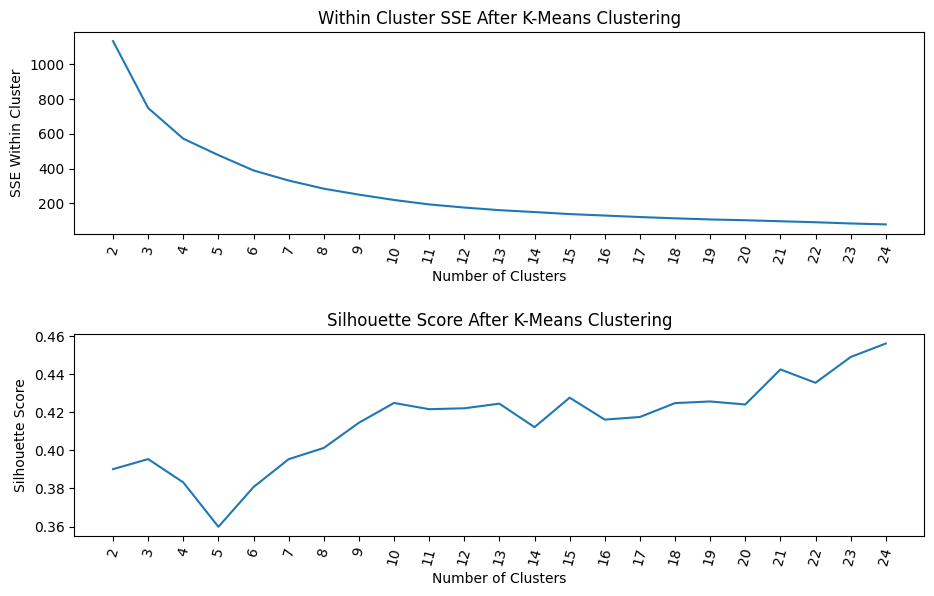

In [ ]:

plot_cluster(cluster_crime_rate_2, max_loop=25)

In [ ]:
cluster_crime_rate_2trial = apply_cluster(cluster_crime_rate_2, clusters=3)


clustering performance
-----------------------------------
silhouette score: 0.39535406025450626
sse within cluster: 746.4004633042657


In [ ]:
sub_cluster_perf_df = (
    cluster_crime_rate_2trial
    .groupby('cluster')
    .agg({"PRICE":"mean", "TOTAL_CRIME":"mean"})
    .sort_values('PRICE')
    .reset_index()
)

sub_cluster_perf_df


,cluster,PRICE,TOTAL_CRIME
0,1,8.497798e+05,2982.922025
1,0,1.444746e+06,1853.439271
2,2,2.032032e+06,2941.553659


setting cluster as 0 as it has the lowest mean total crime

In [ ]:
cluster_crime_rate.query("cluster == 0")


,SOLD DATE,PROPERTY TYPE,ADDRESS,CITY,STATE OR PROVINCE,ZIP_CODE,PRICE,BEDS,BATHS,LOCATION,...,NEXT OPEN HOUSE START TIME,NEXT OPEN HOUSE END TIME,SOURCE,LATITUDE,LONGITUDE,WALK_SCORE,PROPERTY_CRIME,TOTAL_CRIME,SCHOOL_RANKING,cluster
0,NaN,Condo/Co-op,407 Orange St #301,Oakland,CA,94610,535000,1.0,1.0,Adams Point,...,September-10-2023 01:00 PM,September-10-2023 04:00 PM,"bridgeMLS, Bay East AOR, or Contra Costa AOR",37.817373,-122.254688,84,6421,7692,712.0,0
1,NaN,Single Family Residential,5450 Proctor Ave,Oakland,CA,94618,1075000,1.0,1.0,Upper Rockridge,...,September-10-2023 11:00 AM,September-10-2023 02:00 PM,"bridgeMLS, Bay East AOR, or Contra Costa AOR",37.835305,-122.221226,30,6421,7692,582.0,0
2,NaN,Condo/Co-op,1001 46Th St #212,Emeryville,CA,94608,589000,1.0,1.0,Emeryville Bordr,...,September-9-2023 02:00 PM,September-9-2023 04:30 PM,"bridgeMLS, Bay East AOR, or Contra Costa AOR",37.835468,-122.276067,90,21187,22528,NaN,0
3,NaN,Condo/Co-op,245 Perkins St #104,Oakland,CA,94610,439000,1.0,1.0,Adams Point,...,September-9-2023 02:00 PM,September-9-2023 04:00 PM,"bridgeMLS, Bay East AOR, or Contra Costa AOR",37.814753,-122.255872,84,6421,7692,712.0,0
4,NaN,Condo/Co-op,666 Oakland Ave #105,Oakland,CA,94611,419000,1.0,1.0,Rose Garden,...,September-10-2023 02:00 PM,September-10-2023 04:30 PM,"bridgeMLS, Bay East AOR, or Contra Costa AOR",37.820653,-122.249832,86,6421,7692,564.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3674,NaN,Mobile/Manufactured Home,1468 Grand Ave #17,San Leandro,CA,94577,99950,1.0,1.0,Bayshore Commons,...,NaN,NaN,MetroList,37.727536,-122.139155,75,4546,5049,NaN,0
3675,NaN,Single Family Residential,830 Saint Marys Ave,San Leandro,CA,94577,880000,2.0,1.0,San Leandro Brdr,...,NaN,NaN,"bridgeMLS, Bay East AOR, or Contra Costa AOR",37.732251,-122.140741,74,4546,5049,NaN,0
3676,NaN,Multi-Family (2-4 Unit),2042 Alvarado,San Leandro,CA,94577,959999,4.0,2.0,San Leandro,...,NaN,NaN,"bridgeMLS, Bay East AOR, or Contra Costa AOR",37.715581,-122.158518,72,4546,5049,NaN,0
3677,NaN,Single Family Residential,342 Marina Blvd,San Leandro,CA,94577,1350000,2.0,1.0,SAN LEANDRO,...,NaN,NaN,MLSListings,37.716493,-122.152868,81,4546,5049,NaN,0


In [ ]:
lowest_crime_rate = cluster_crime_rate_2trial.query("cluster == 0")


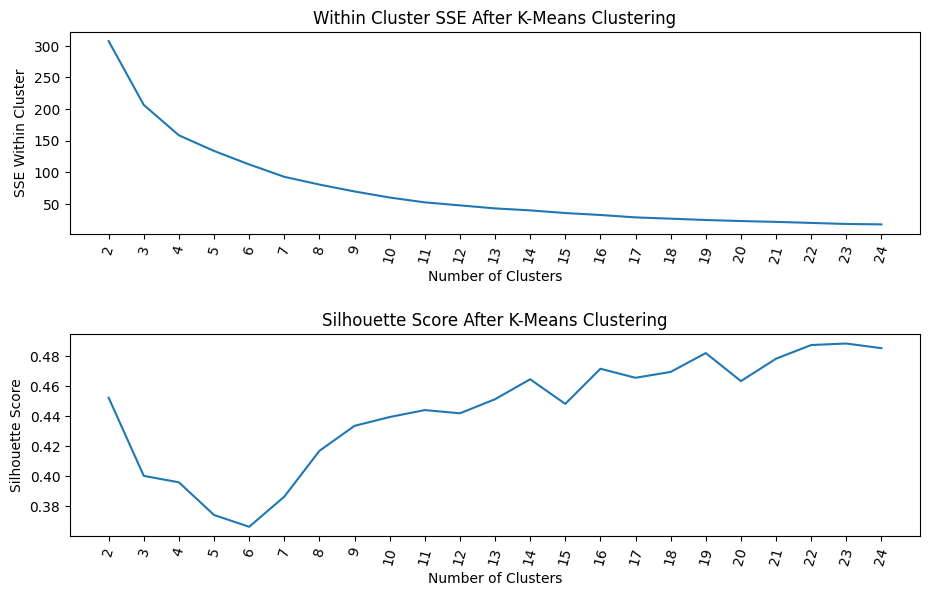

In [ ]:
plot_cluster(lowest_crime_rate, max_loop=25)

In [ ]:
cluster_crime_price_3trial = apply_cluster(lowest_crime_rate, clusters=3)

clustering performance
-----------------------------------
silhouette score: 0.400248202793831
sse within cluster: 206.42157198942863


### Golden clusters

In [ ]:
best_sub_cluster_perf = (
    cluster_crime_price_3trial
    .groupby('cluster')
    .agg({"PRICE":"mean", "TOTAL_CRIME":"mean"})
    .sort_values('PRICE')
    .reset_index()
)
best_sub_cluster_perf


,cluster,PRICE,TOTAL_CRIME
0,0,8.726489e+05,1711.687500
1,1,1.423339e+06,2121.364035
2,2,2.160016e+06,1520.040984


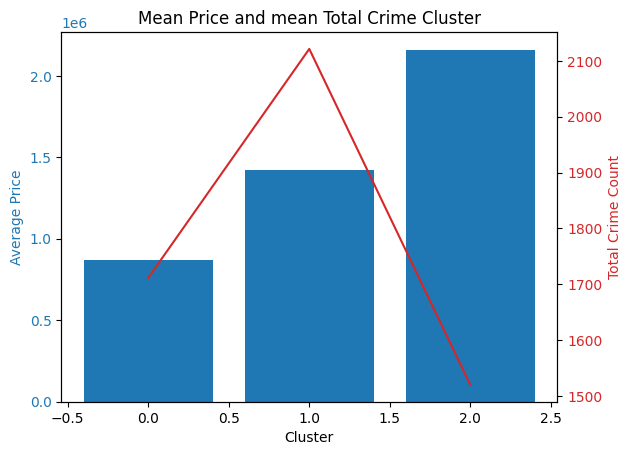

In [ ]:
import matplotlib.pyplot as plt

# Extract data
clusters = best_sub_cluster_perf['cluster']
price_mean = best_sub_cluster_perf['PRICE']
total_crime_count = best_sub_cluster_perf['TOTAL_CRIME']

# Create a figure and a set of subplots
fig, ax1 = plt.subplots()

# First plot: Price (mean) as a bar plot
color = 'tab:blue'
ax1.set_xlabel('Cluster')
ax1.set_ylabel('Average Price', color=color)
ax1.bar(clusters, price_mean, color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Second plot: Total Crime (count) as a line plot with a secondary y-axis
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Total Crime Count', color=color)
ax2.plot(clusters, total_crime_count, color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Title and show plot
plt.title('Mean Price and mean Total Crime Cluster')
plt.show()


clusters 0is  with least crime rate and affordable housing